# **Statistical comparative analysis of Genres/Country/Year**

In this part, based on the three characteristics : movie genres,country and release year, we will analyze the characteristics of Douban and IMDB user's favorite movies respectively and make a comparison.

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import squarify
#Set full text font
plt.rcParams.update({'font.family': 'Times New Roman'})
#Import dataset
movies_imdb_df=pd.read_csv("imdb_movie_all.csv")
display(movies_imdb_df.head())
movies_douban_df=pd.read_csv("douban_movie_all.csv")
display(movies_douban_df.head())

,Name,Year,Rate,Level,Directors,Writers,Stars,Genres,Runtime,Country,Language,Budget,Box_Office_USA,Box_Office_World
0,The Shawshank Redemption,1994,9.3,IIB,Frank Darabont,Stephen King/Frank Darabont,Tim Robbins/Morgan Freeman/Bob Gunton/See full...,Drama,142 min,USA,English,"$25,000,000","$28,699,976","$28,817,291"
1,The Godfather,1972,9.2,IIB,Francis Ford Coppola,Mario Puzo/Francis Ford Coppola/1 more credit,Marlon Brando/Al Pacino/James Caan/See full ca...,Crime/Drama,175 min,USA,English/Italian/Latin,"$6,000,000","$134,966,411","$246,120,986"
2,The Godfather: Part II,1974,9.0,IIB,Francis Ford Coppola,Francis Ford Coppola/Mario Puzo/1 more credit,Al Pacino/Robert De Niro/Robert Duvall/See ful...,Crime/Drama,202 min,USA,English/Italian/Spanish/Latin/Sicilian,"$13,000,000","$47,834,595","$48,035,783"
3,The Dark Knight,2008,9.0,IIB,Christopher Nolan,Jonathan Nolan/Christopher Nolan/3 more credits,Christian Bale/Heath Ledger/Aaron Eckhart/See ...,Action/Crime/Drama/Thriller,152 min,USA/UK,English/Mandarin,"$185,000,000","$534,858,444","$1,005,973,645"
4,12 Angry Men,1957,9.0,I,Sidney Lumet,Reginald Rose/Reginald Rose,Henry Fonda/Lee J. Cobb/Martin Balsam/See full...,Crime/Drama,96 min,USA,English,"$350,000",NaN,$955


,电影,年份,评分,导演,编剧,主演,类型,国家/地区,语言,时长
0,肖申克的救赎,1994,9.7,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,剧情/犯罪,美国,英语,142分钟
1,霸王别姬,1993,9.6,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,剧情/爱情/同性,中国大陆 / 中国香港,汉语普通话,171分钟
2,阿甘正传,1994,9.5,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,剧情/爱情,美国,英语,142分钟
3,这个杀手不太冷,1994,9.4,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,剧情/动作/犯罪,法国 / 美国,英语 / 意大利语 / 法语,110分钟(剧场版)
4,泰坦尼克号,1997,9.4,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,剧情/爱情/灾难,美国,英语 / 意大利语 / 德语 / 俄语,194分钟


## **Genres**

In [2]:
# Movie genres statistics function
def genres_process(df,a,b):
    df1=df[a].str.split('/')
    df1=df1.apply(pd.Series)
    df1=df1.apply(pd.value_counts)
    df1=df1.unstack().dropna().reset_index()
    df1.columns =['level_0','Genres',b]
    df1_m =df1.drop(['level_0'],axis=1).groupby('Genres').sum().sort_values(by=[b],ascending=False).reset_index()
    return df1_m

In [3]:
# Imdb genres statistics
imdb_genres=genres_process(movies_imdb_df,'Genres','imdb_counts')
#imdb_genres

In [4]:
# Douban genres statistics
douban_genres=genres_process(movies_douban_df,'类型','douban_counts')
#View the Chinese type label and replace it with English
#display(douban_genres)
douban_genres['Genres']=['Drama','Romance','Comedy','Adventure','Crime','Mystery','Animation','Thriller','Action','Fantasy','Sci-Fi','Family','War',
                       'Biography','ancient costume','homosex','History','Music','Child','Musical','Martial arts','documentary','Western',
                       'Sex','Horror','Disaster','Sport']
#douban_genres

In [5]:
# Merge data and display
Genrescount=pd.merge(imdb_genres,douban_genres,how='inner').fillna(0)
display(Genrescount)

,Genres,imdb_counts,douban_counts
0,Drama,187.0,183.0
1,Thriller,65.0,33.0
2,Crime,58.0,43.0
3,Adventure,55.0,45.0
4,Comedy,44.0,55.0
5,Action,43.0,33.0
6,Mystery,37.0,41.0
7,War,31.0,16.0
8,Biography,27.0,15.0
9,Sci-Fi,27.0,22.0


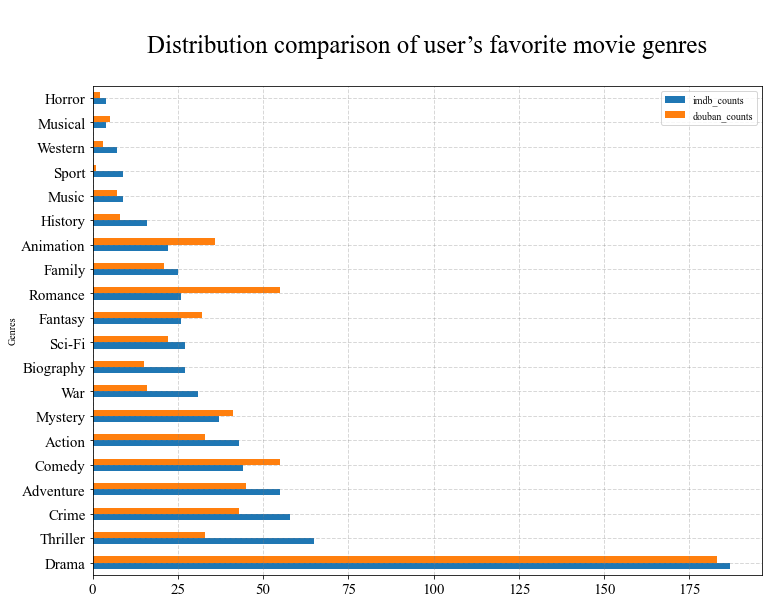

In [6]:
# plot comparative figure of genres distribution
Genrescount = Genrescount.set_index(Genrescount['Genres']) 
plt.rcParams['figure.figsize']=(12,9)
Genrescount.plot.barh(fontsize = 15)
plt.grid(color='gray',linestyle='--',linewidth=1,alpha=0.3)
plt.title('\nDistribution comparison of user’s favorite movie genres\n',color = 'black',fontsize = 25)
plt.savefig('Genres_bar.png',bbox_inches = 'tight',dpi = 300)
plt.show() 

In [7]:
# Plot TOP10 movie genres tree diagram
# Plot function
def genres_plot(size,name,a,b):
    colors = ['purple','#9999ff','red','indianred', 'green','yellow','darkorange','lightgreen','cyan','bisque']
    plot = squarify.plot(
       sizes=size,
       color = colors,
       label=name,
       value=size,
       alpha = 0.6,
       edgecolor = 'White',
       linewidth =1 
    )
    plt.rc('font', size=20)  
    plot.set_title(a,fontdict = {'fontsize':25})   
    plt.axis('off')
    plt.tick_params(top = 'off', right = 'off')
    plt.savefig(b,bbox_inches = 'tight',dpi = 300)
    plt.show()

,Genres,imdb_counts
0,Drama,187.0
1,Thriller,65.0
2,Crime,58.0
3,Adventure,55.0
4,Comedy,44.0
5,Action,43.0
6,Mystery,37.0
7,War,31.0
8,Biography,27.0
9,Sci-Fi,27.0


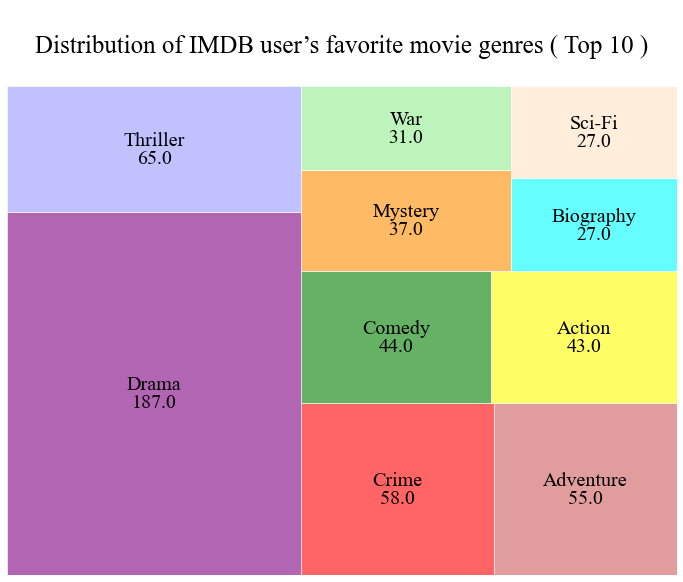

In [10]:
# Plot imdb TOP10 movie genres tree diagram
display(imdb_genres.head(10))
size_imdb=imdb_genres['imdb_counts'][0:10].tolist()
name_imdb=imdb_genres['Genres'][0:10].tolist()
genres_plot(size_imdb,name_imdb,'\nDistribution of IMDB user’s favorite movie genres ( Top 10 )\n','Genres_imdb')

,Genres,douban_counts
0,Drama,183.0
1,Romance,55.0
2,Comedy,55.0
3,Adventure,45.0
4,Crime,43.0
5,Mystery,41.0
6,Animation,36.0
7,Thriller,33.0
8,Action,33.0
9,Fantasy,32.0


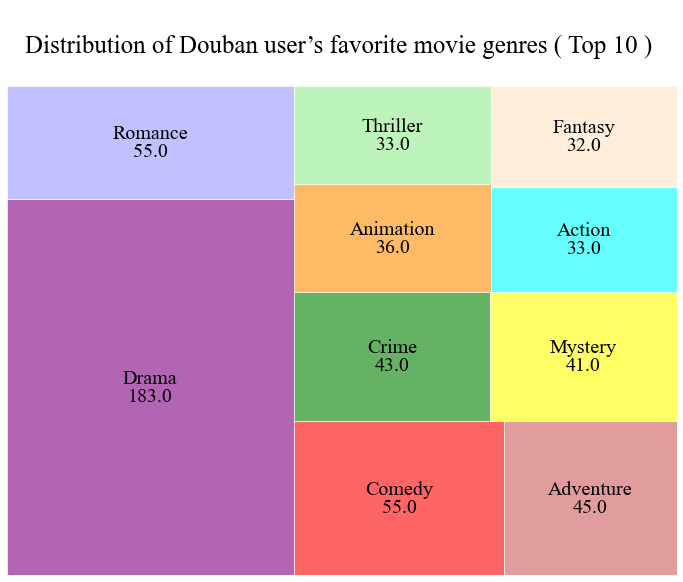

In [9]:
# Plot imdb TOP10 movie genres tree diagram
display(douban_genres.head(10))
size_imdb=douban_genres['douban_counts'][0:10].tolist()
name_imdb=douban_genres['Genres'][0:10].tolist()
genres_plot(size_imdb,name_imdb,'\nDistribution of Douban user’s favorite movie genres ( Top 10 ) \n','Genres_douban')

By comparing the top 10 movie types and their distribution in the two websites' user favorite movie lists, we find that: Generally speaking, the top 10 movie types are roughly the same, among these 10 genres, 7 genres are covered in both platforms. The 3 additional genres in imdb are  "war", "biography" and "fantasy" ,which are also the bottom three in the imdb_top10_genres list.The additional genres in douban are "Romance", "animation" and "Thriller".

In terms of the proportion of movie types, there are significant differences between the two platforms. IMDB platform has a high proportion of sci-fi, adventure, action and other high-cost movies, while Douban platform, on the contrary, has a high proportion of Romance, comedy, animation and other low-cost movies. It is worth mentioning that on Douban platform, the 'Romance',douban users' second favorite movie genre is even not on IMDB_top10_genres list.

This difference comes from the difference in industry development trend and market orientation between Chinese film and international film. There is a obvious gap between Chinese film industry and international first-line level in the development of sci-fi film and other film types with higher requirements for film production technology. Due to the limitation of environment and in line with Chinese cultural atmosphere, Douban users will prefer some story films with larger quantity base , While IMDB users prefer the movie genres like science fiction.

To sum up, for new users, when referring to and browsing movie reviews, they can choose the appropriate platform for discussion and participation according to the different movie type preferences of the two platforms.

## **Country**

In [11]:
# Country statistics function
def Country_process(df,a,b):
    df1=df[a].str.split('/')
    df1=df1.apply(pd.Series)
    df1=df1.apply(pd.value_counts)
    df1=df1.unstack().dropna().reset_index()
    df1.columns =['level_0','Country',b]
    df1_m =df1.drop(['level_0'],axis=1).groupby('Country').sum().sort_values(by=[b],ascending=False).reset_index()
    return df1_m

In [12]:
#Imdb Country statistics
imdb_country=Country_process(movies_imdb_df,'Country','imdb_counts')

In [13]:
#Douban Country statistics
douban_country=Country_process(movies_douban_df,'国家/地区','douban_counts')
#View the Chinese type label and replace it with English
douban_country['Country'].unique()

array([' 美国', ' 美国 ', ' 日本', ' 中国香港', ' 英国', ' 英国 ', ' 中国大陆', ' 韩国',
       ' 法国 ', ' 法国', ' 中国大陆 ', ' 德国', ' 中国香港 ', ' 德国 ', ' 加拿大', ' 意大利',
       ' 澳大利亚', ' 中国台湾 ', ' 印度', ' 意大利 ', ' 瑞士 ', ' 中国台湾', ' 新西兰', ' 瑞典',
       ' 巴西 ', ' 南非 ', ' 西班牙', ' 西班牙 ', ' 澳大利亚 ', ' 荷兰 ', ' 阿根廷 ', ' 阿联酋',
       ' 瑞士', ' 新西兰 ', ' 爱尔兰 ', ' 泰国', ' 波兰 ', ' 日本 ', ' 捷克', ' 希腊',
       ' 奥地利 ', ' 南非', ' 加拿大 ', ' 俄罗斯', ' 伊朗', ' 丹麦 ', ' 黎巴嫩 '],
      dtype=object)

In [14]:
Country = {' 美国':'USA', ' 美国 ':'USA', ' 日本':'Japan', ' 中国香港':'Hong Kong', ' 英国':'UK', ' 英国 ':'UK',
           ' 中国大陆':'China', ' 韩国':'South Korea',' 法国 ':'Germany', ' 法国':'Germany', ' 中国大陆 ':'China', 
           ' 德国':'France', ' 中国香港 ':'Hong Kong', ' 德国 ':'France', ' 加拿大':'Canada', ' 意大利':'Italy',
       ' 澳大利亚':'Australia', ' 中国台湾 ':'China', ' 印度':'India', ' 意大利 ':'Italy', ' 瑞士 ':'Switzerland',
        ' 中国台湾':'China', ' 新西兰':'New Zealand', ' 瑞典':'Sweden',' 巴西 ':'Brazil', ' 南非 ':'South Africa',
           ' 西班牙':'Spain', ' 西班牙 ':'Spain', ' 澳大利亚 ':'Australia', ' 荷兰 ':'Netherlands', ' 阿根廷 ':'Argentina',
           ' 阿联酋':'Arab',' 瑞士':'Switzerland', ' 新西兰 ':'New Zealand', ' 爱尔兰 ':'Ireland', ' 泰国':'Thailand', 
           ' 波兰 ':'Poland', ' 日本 ':'Japan', ' 捷克':'Czechoslovakia', ' 希腊':'Greece',' 奥地利 ':'Austria', 
           ' 南非':'South Africa', ' 加拿大 ':'Canada', ' 俄罗斯':'Soviet Union', ' 伊朗':'Iran', ' 丹麦 ':'Denmark',
           ' 黎巴嫩 ':'Lebanon'}
douban_country = douban_country.replace(Country)
douban_country=douban_country.groupby('Country').sum().sort_values(by=['douban_counts'],ascending=False).reset_index()

In [15]:
#merge data and display
Countrycount=pd.merge(imdb_country,douban_country,how='outer').fillna(0)
Countrycount

,Country,imdb_counts,douban_counts
0,USA,176.0,136.0
1,UK,50.0,36.0
2,France,24.0,17.0
3,Japan,17.0,36.0
4,Germany,14.0,19.0
5,Italy,13.0,10.0
6,India,11.0,4.0
7,Spain,8.0,4.0
8,Australia,6.0,7.0
9,Canada,6.0,7.0


,Country,imdb_counts
0,USA,176.0
1,UK,50.0
2,France,24.0
3,Japan,17.0
4,Germany,14.0
5,Italy,13.0
6,India,11.0
7,Spain,8.0
8,Australia,6.0
9,Canada,6.0


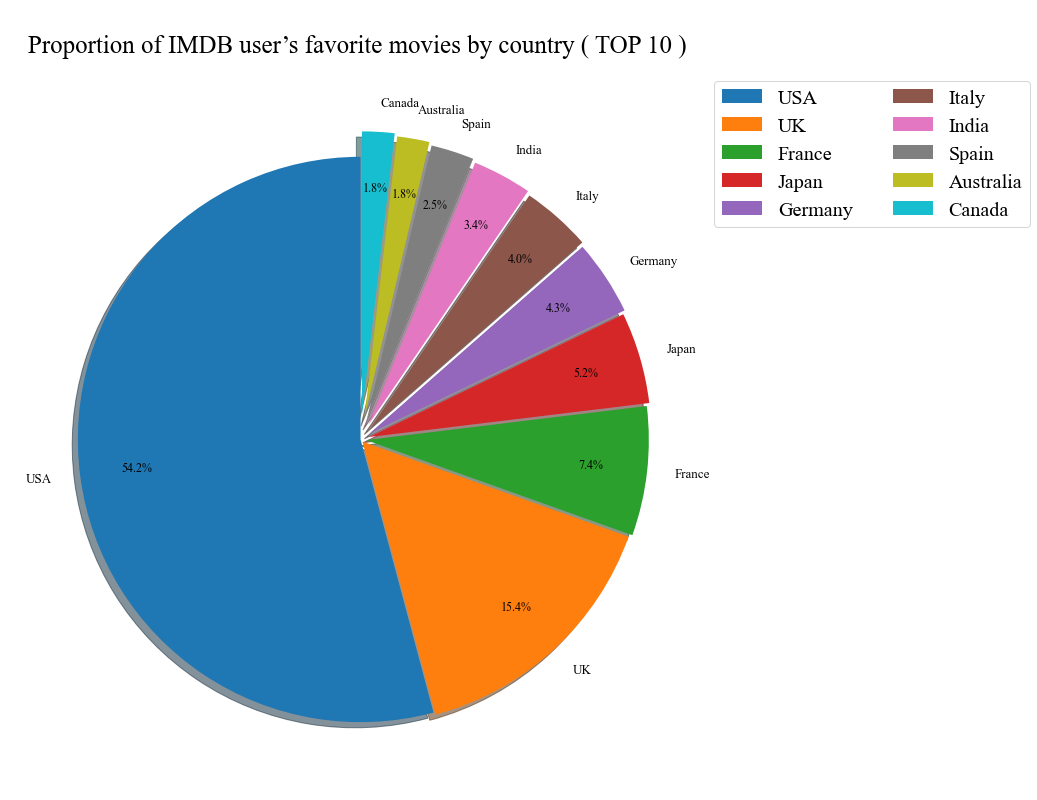

In [16]:
#Display imdb-Top10 country
display(imdb_country.head(10))

#plot imdb_Top10_country_pie
labels = imdb_country.head(10)['Country']
sizes =  imdb_country.head(10)['imdb_counts']
plt.figure(figsize=(20,13))
explode =[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
patches,l_text,p_text=plt.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,pctdistance=0.8)
plt.legend(ncol=2,bbox_to_anchor=(1, 0.8), loc=3, borderaxespad=0)
for t in p_text:
    t.set_size(12)
for t in l_text:
    t.set_size(13)
plt.title('\nProportion of IMDB user’s favorite movies by country ( TOP 10 ) \n',color = 'black',fontsize = 25)
plt.savefig('country_imdb.png',bbox_inches = 'tight',dpi = 300)
plt.show()

,Country,douban_counts
0,USA,136.0
1,Japan,36.0
2,UK,36.0
3,China,32.0
4,Hong Kong,29.0
5,Germany,19.0
6,France,17.0
7,South Korea,12.0
8,Italy,10.0
9,Canada,7.0


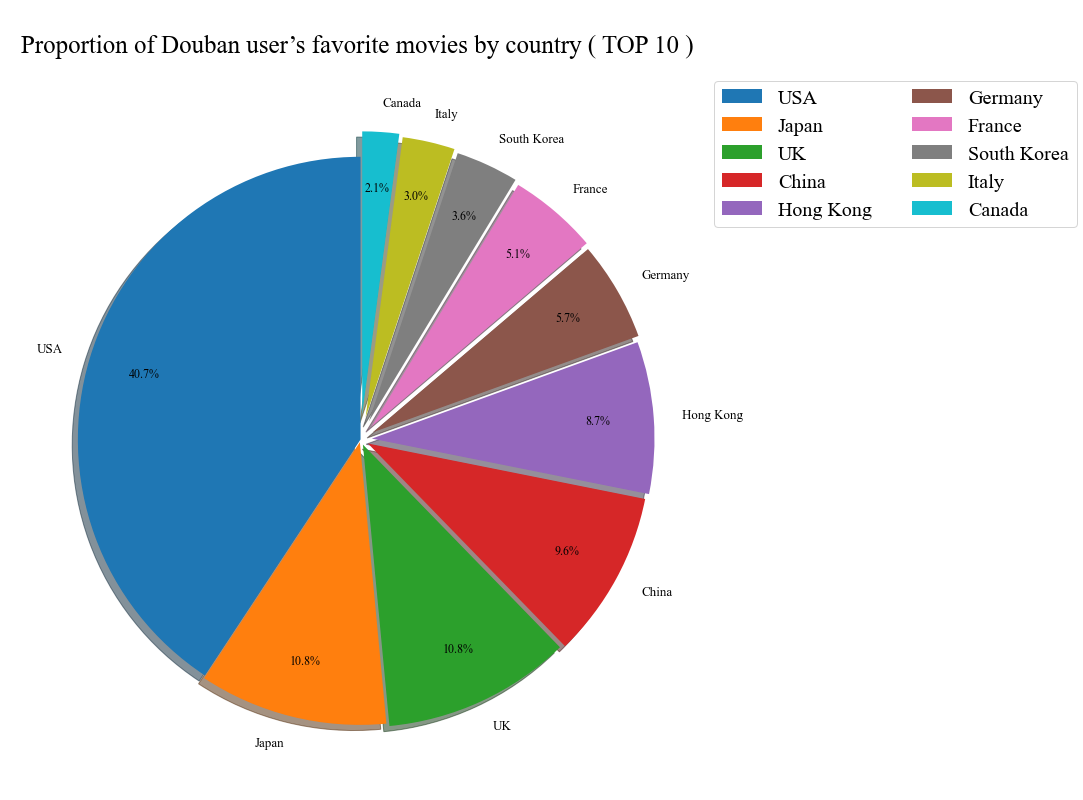

In [17]:
#Display douban-Top10 country
display(douban_country.head(10))

#plot douban_Top10_country_pie
labels = douban_country.head(10)['Country']
sizes =  douban_country.head(10)['douban_counts']
plt.figure(figsize=(20,13))
explode =[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
patches,l_text,p_text=plt.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,pctdistance=0.8)
plt.legend(ncol=2,bbox_to_anchor=(1, 0.8), loc=3, borderaxespad=0)
for t in p_text:
    t.set_size(12)
for t in l_text:
    t.set_size(13)
plt.title('\nProportion of Douban user’s favorite movies by country ( TOP 10 ) \n',color = 'black',fontsize = 25)
plt.savefig('country_douban.png',bbox_inches = 'tight',dpi = 300)
plt.show()

Comparison between the two platforms in terms of the geographical distribution of users' favorite movies:

`1` Generally, American films on both platforms are absolutely dominant, accounting for half of the country, while the rest of the countries share the rest.

`2` IMDB users love movies mainly from western countries. In addition to the United States, the United Kingdom, France and Germany all account for a high proportion, with only two Asian countries in the top ten countries.

`3`Compared with IMDB, the proportion of Asian countries' films on the double list has increased, with China, Japan and South Korea all occupying a certain proportion. However, it can not be ignored that although Douban, even though with almost all Asian users, The proportion of users' favorite movies in western countries is still higher than other regions. Thus it can be seen that for a long time, the mainstream Western values have maintained a certain influence on the user preferences of the film industry. Meanwhile, the early development of the western film industry and the large base are also part of the reasons.

`4`Finally, I think we should firmly believe that movies have a common language, as well as the universal values,which cross regional ethnic, national and gender differences. Therefore, from the perspective of China, how to build an international film industry,tell stories to the people of the world, and truly build a spiritual and cultural community of human destiny will be the next significant topic that Chinese movies need to explore.

## **Year**

In [18]:
# Movie release year statistics function
def yearcount(df,item1,item2,item3):
    df=df[[item1,item2]].groupby(item1).count()
    df=df.reset_index(drop=False)
    df.columns=['Year',item3]
    return df
# IMDB movie release year statistics
imdb_yearcount=yearcount(movies_imdb_df,'Year','Name','imdb_counts')
# Douban movie release year statistics
douban_yearcount=yearcount(movies_douban_df,'年份','电影','douban_counts')

In [22]:
#Merge data and display
yearcount=pd.merge(imdb_yearcount,douban_yearcount,how='outer').fillna(0)
yearcount[63:84]

,Year,imdb_counts,douban_counts
63,2000,6,5.0
64,2001,5,9.0
65,2002,4,8.0
66,2003,5,10.0
67,2004,6,13.0
68,2005,3,4.0
69,2006,5,9.0
70,2007,4,4.0
71,2008,3,10.0
72,2009,6,9.0


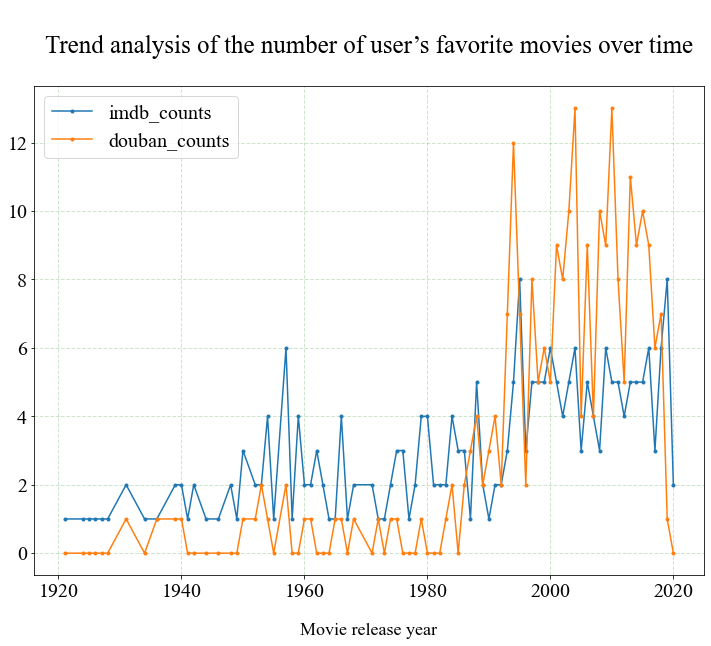

In [20]:
#Plot users' favorite movie genres over time comparison line chart
yearcount = yearcount.set_index(yearcount['Year']) 
yearcount[['imdb_counts','douban_counts']].plot(marker = 'o',markersize =3)
plt.grid(color='green',linestyle='--',linewidth=1,alpha=0.2)
plt.title('\nTrend analysis of the number of user’s favorite movies over time\n',color = 'black',fontsize = 25)
plt.xlabel('\nMovie release year',fontsize = 18,color = 'black',)
plt.savefig('year.png',bbox_inches = 'tight',dpi = 300)
plt.show()

By comparing the line graph, we find that:

`1` In general, the distribution and trend of the number of user’s favorite movies over time are almost the same. Before 2000, the number of films on the list is relatively small. After 2000, the number of films in the last 20 years of the 21st century has increased significantly,This may be closely related to the maturity of the audio and sound industry and the popularization and development of the Internet.

`2`Among the 250 movies listed on the two websites, IMDB users prefer more movies released before 2000, while Douban users have a higher preference for movies in the past 20 years after 2000, which shows that,to some extent, IMDB users prefer old movies in the past century, while douban users pay more attention to new films.

`3`The two website users' preference for different ages of movies can also give new users some help for film review and selection.